In [1]:
import pandas as pd
import scanpy as sc
import numpy as np 

In [10]:
import pegasus
import pegasusio

In [15]:
integrated_coexpressalog_only = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_only_coexpressalogs.loom')
all_genes_integrated = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_all_coexpressalog_and11.loom')
only_1_1_integrated = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_only11.loom')
random_integration = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_random_genes.loom')


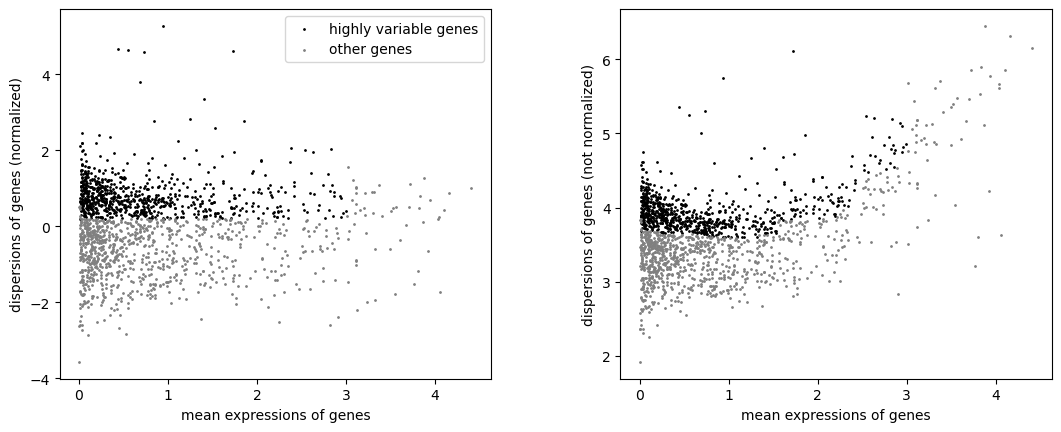

In [6]:
sc.pp.highly_variable_genes(integrated_coexpressalog_only, min_mean=0.0125, max_mean=3, min_disp=0.2) # disp .5
sc.pl.highly_variable_genes(integrated_coexpressalog_only)

         Falling back to preprocessing with `sc.pp.pca` and default params.


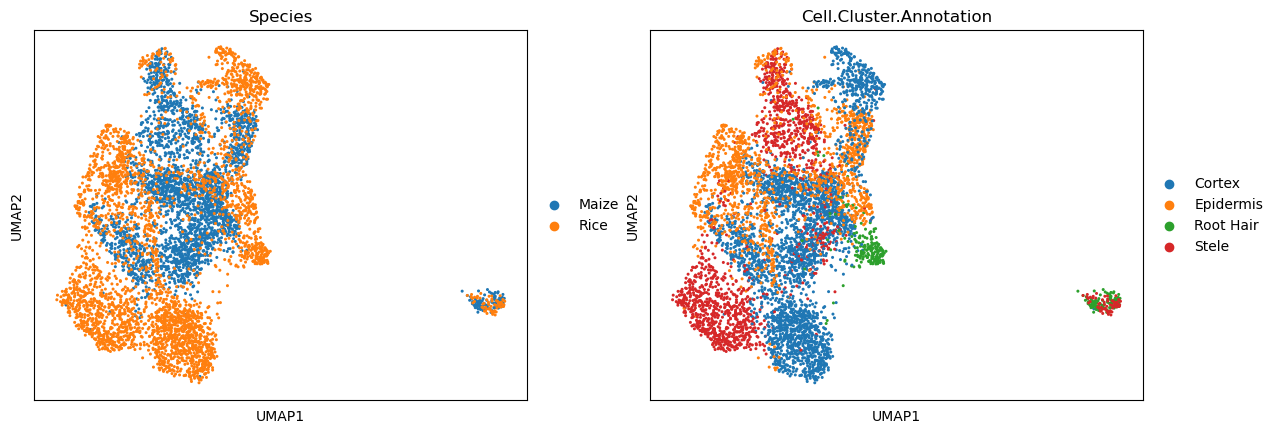

In [7]:
#sc.tl.pca(integrated_coexpressalog_only, svd_solver='arpack', )
sc.pp.neighbors(integrated_coexpressalog_only, n_neighbors=30, n_pcs=50, random_state= 863)
sc.tl.umap(integrated_coexpressalog_only, random_state= 2335)
sc.pl.umap(integrated_coexpressalog_only, color=['Species', 'Cell.Cluster.Annotation'])

In [11]:
pegasus_version_integrated_coexpressalog_only = pegasusio.MultimodalData(integrated_coexpressalog_only)

In [13]:
pegasus_kbet_results = pegasus.calc_kBET(data = pegasus_version_integrated_coexpressalog_only, attr ='Species')

2022-09-05 18:12:30,831 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.69s.


In [14]:
pegasus_kbet_results

(19.06747435028128, 0.04775040429281893, 0.12492103600758055)

         Falling back to preprocessing with `sc.pp.pca` and default params.


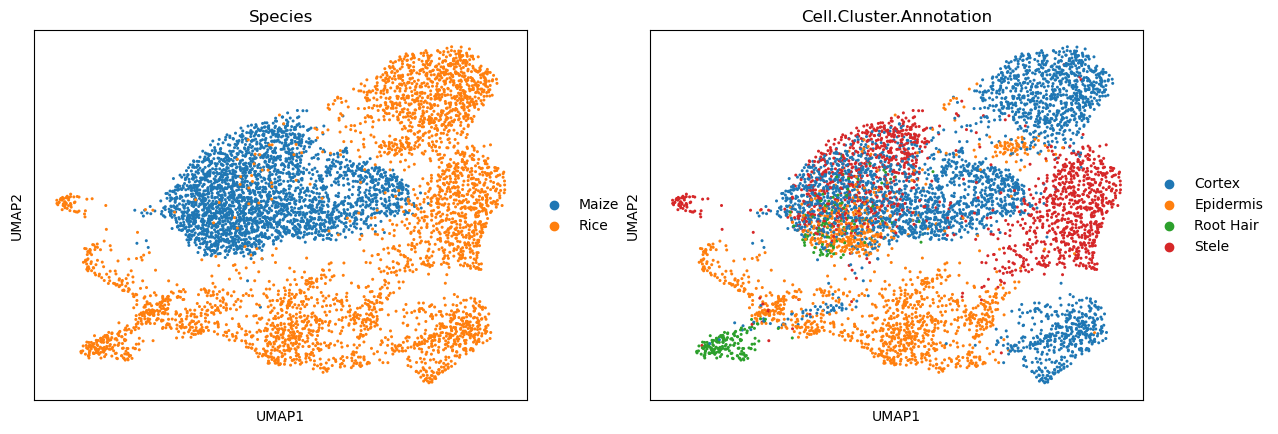

In [16]:
sc.pp.neighbors(random_integration, n_neighbors=30, n_pcs=50, random_state= 8693)
sc.tl.umap(random_integration, random_state= 54)
sc.pl.umap(random_integration, color=['Species', 'Cell.Cluster.Annotation'])

In [17]:
random_integration_pegasus = pegasusio.MultimodalData(random_integration)


In [18]:
pegasus_kbet_results_random = pegasus.calc_kBET(data = random_integration_pegasus, attr ='Species')

2022-09-05 18:48:26,657 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.75s.


In [19]:
pegasus_kbet_results_random

(23.133763470538977, 0.01736860317047598, 0.044693619709412505)

         Falling back to preprocessing with `sc.pp.pca` and default params.


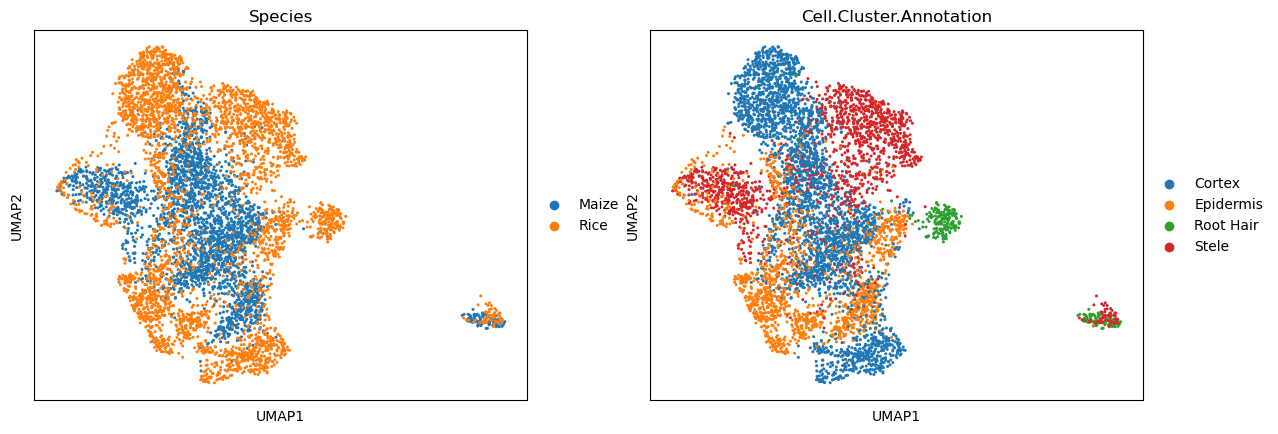

In [20]:
sc.pp.neighbors(all_genes_integrated, n_neighbors=30, n_pcs=50, random_state= 8693)
sc.tl.umap(all_genes_integrated, random_state= 54)
sc.pl.umap(all_genes_integrated, color=['Species', 'Cell.Cluster.Annotation'])

In [22]:
all_genes_pegasus = pegasusio.MultimodalData(all_genes_integrated)
pegasus_kbet_results_all_genes = pegasus.calc_kBET(data = all_genes_pegasus, attr ='Species')
pegasus_kbet_results_all_genes

2022-09-05 18:51:39,581 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.70s.


(17.073406359966928, 0.051531690467310605, 0.13644977890082122)